In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import time
import collections
import numpy as np
import math
from IPython.display import Markdown, display
from sklearn.metrics import pairwise

COUNT = 1
DISTANCE_WEIGHTED = 2
EUCLID = 3
COSINE = 4

%matplotlib inline


def printmd(string):
    display(Markdown(string))

In [40]:
# Import data
wine = pd.read_csv('winequality-red.csv', sep = ';')

      class
High    855
Low     744


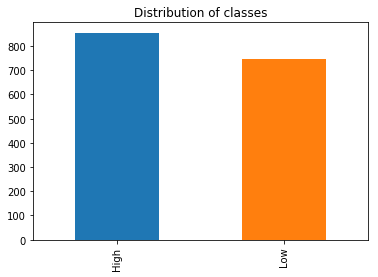

In [41]:
# Creating the class attribute
wine['class'] = ['Low' if i <= 5 else "High" for i in wine.quality]
wine['class'].value_counts().plot(kind = 'bar', title = 'Distribution of classes')

# Dropping quality attribute
wine.drop(columns = ['quality'], inplace = True)

# Paritioning dependent attributes from the independent attributes
wine_data = wine[wine.columns[wine.columns != 'class']]
wine_label = wine['class']
print(pd.DataFrame(wine_label.value_counts()))

In [21]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low


In [22]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


## Boxplot

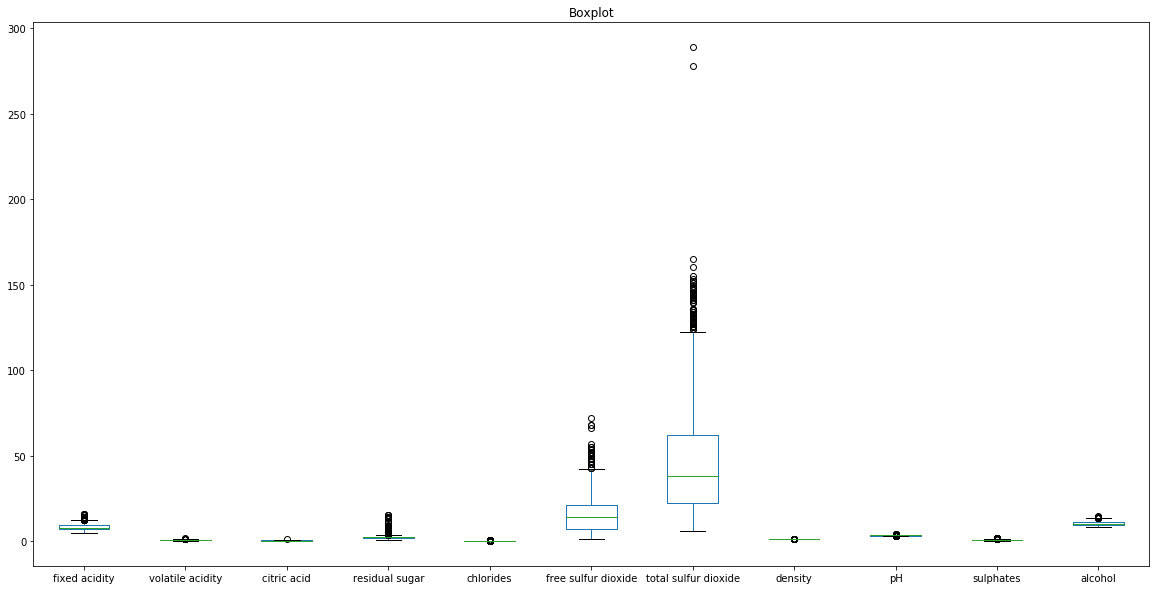

In [23]:
printmd('## Boxplot')
wine_data.plot(kind = 'box', figsize = (20,10), title = 'Boxplot')

## Outlier Analysis

### Boxplot

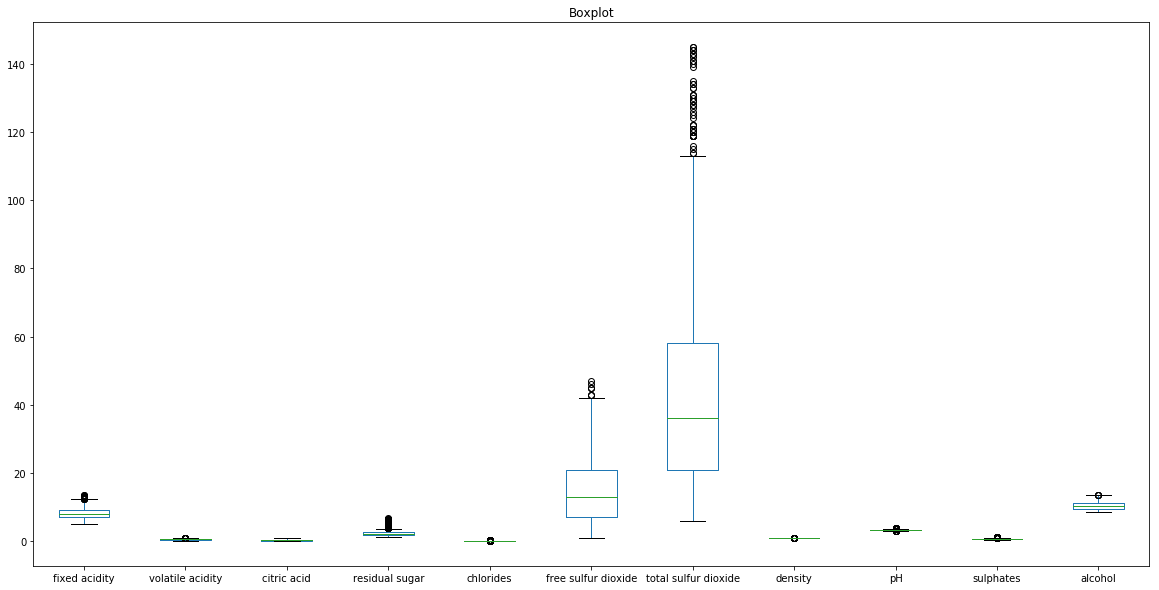

In [25]:
printmd('## Outlier Analysis')
# Removing outliers
# Keeping records where the column values are within +3/-3 standard deviations from the mean

outlier_filter = (np.abs(wine_data - wine_data.mean()) <= (3*wine_data.std())).all(1)
wine_data = wine_data[outlier_filter] 
wine_label = wine_label[outlier_filter]

printmd('### Boxplot')
wine_data.plot(kind = 'box', figsize = (20,10), title = 'Boxplot')

In [26]:
printmd('## Correlation Matrix')
wine_data.corr(method = 'pearson')

## Correlation Matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.296566,0.699747,0.175809,0.187853,-0.146702,-0.098843,0.660497,-0.704507,0.200796,-0.018384
volatile acidity,-0.296566,1.000000,-0.589286,0.032331,0.070307,0.008824,0.104585,-0.000446,0.252900,-0.350547,-0.212767
citric acid,0.699747,-0.589286,1.000000,0.178784,0.104950,-0.072097,0.007320,0.372338,-0.521270,0.303401,0.164420
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,-0.005795,0.091381,0.343236,-0.072787,0.071218,0.162423
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,-0.057342,0.040874,0.330104,-0.183105,0.025329,-0.209711
free sulfur dioxide,-0.146702,0.008824,-0.072097,-0.005795,-0.057342,1.000000,0.660348,-0.039334,0.107444,0.059713,-0.076400
total sulfur dioxide,-0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,-0.007726,-0.037164,-0.257834
density,0.660497,-0.000446,0.372338,0.343236,0.330104,-0.039334,0.116386,1.000000,-0.311217,0.127562,-0.469611
pH,-0.704507,0.252900,-0.521270,-0.072787,-0.183105,0.107444,-0.007726,-0.311217,1.000000,-0.039558,0.136659
sulphates,0.200796,-0.350547,0.303401,0.071218,0.025329,0.059713,-0.037164,0.127562,-0.039558,1.000000,0.240684


In [32]:
printmd('## Correlated Pairs')
correlated_pairs = wine_data.corr()
top_correlated_pairs = correlated_pairs.unstack().sort_values(kind="quicksort")
pd.DataFrame(top_correlated_pairs[((top_correlated_pairs < -0.5) & (top_correlated_pairs > -1)) | ((top_correlated_pairs>0.5) & (top_correlated_pairs <1))], columns = ['Coefficient'])

## Correlated Pairs

,,Coefficient
pH,fixed acidity,-0.704507
fixed acidity,pH,-0.704507
volatile acidity,citric acid,-0.589286
citric acid,volatile acidity,-0.589286
pH,citric acid,-0.521270
citric acid,pH,-0.521270
free sulfur dioxide,total sulfur dioxide,0.660348
total sulfur dioxide,free sulfur dioxide,0.660348
density,fixed acidity,0.660497
fixed acidity,density,0.660497


In [ ]:
# Splitting data into train/test
X = np.array(wine_data)
y = np.array(wine_label)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def euclidian_distance(A, B):
    if not (A.ndim == 1 and B.ndim == 1):
        raise ValueError("Both numpy arrays should be single rows (1 dimensional).")
    return np.sqrt(np.sum(np.square(A - B)))

def cosine_similarity(A, B):
    if not (A.ndim == 1 and B.ndim == 1):
        raise ValueError("Both numpy arrays should be single rows (1 dimensional).")
    return np.sum(A*B)/(np.sqrt(np.sum(A*A)) * np.sqrt(np.sum(B*B)))


def predict(train_X, labels, test, K, metric, measure):
    distances = []
    for i, sample in enumerate(train_X):
        if measure == EUCLID:
            distance = euclidian_distance(sample, test)
        elif measure == COSINE:
            distance = cosine_similarity(sample, test)
        distances.append((distance, i))

    distances.sort()

    return predict_label(distances, labels, K, metric, measure)

def predict_label(distances, labels, K, metric, measure):
    if metric == COUNT:
        k_closest = [labels[x[1]] for x in distances[:K]]
        counts = collections.Counter(k_closest)
        return counts.most_common()[0][0], counts.most_common()[0][1] / K
    if metric == DISTANCE_WEIGHTED:
        label_sum = {}
        max_sum = -1
        count = 0
        for distance, index in distances:
            if distance == 0: continue
            if count == K: break
            count += 1
            label_sum[labels[index]] = label_sum.get(labels[index], 0) + (1 / distance)
            if label_sum[labels[index]] > max_sum:
                max_sum = label_sum[labels[index]]
                predicted_label = labels[index]
        return predicted_label, max_sum / sum(label_sum.values())
    
def kNN(X_train, y_train, X_test, y_test, K, metric, measure):
    predicted = []
    for i, test in enumerate(X_test):
        predicted_class, posterior = predict(X_train, y_train, test, K, metric, measure)
        actual_class = y_test[i]
        predicted.append((actual_class, predicted_class, posterior))
    
    prediction = pd.DataFrame.from_records(predicted, columns=["Actual", "Predicted", "Posterior"])
    
    return prediction

def get_accuracy(prediction_df):
    return prediction_df[prediction_df["Actual"] == prediction_df["Predicted"]].shape[0] / prediction_df.shape[0]

In [ ]:
get_accuracy(kNN(X_train, y_train, X_test, y_test, 24, DISTANCE_WEIGHTED, EUCLID))

In [ ]:
get_accuracy(kNN(X_train, y_train, X_test, y_test, 24, COUNT, EUCLID))

In [ ]:
# Maximum accuracy is found at K = 38 for the euclidian distance measure.
def optimal_K(metric):
    K_candidates = range(1,50,2)
    errors = []
    for K in K_candidates:
        accuracy = get_accuracy(kNN(X_train, y_train, X_test, y_test, K, metric))
        errors.append(1 - accuracy)
    
    plt.plot(K_candidates, errors)
    plt.show()
    return np.where(errors==np.min(errors))

In [ ]:
print(optimal_K(COUNT))
print(optimal_K(DISTANCE_WEIGHTED))


In [ ]:
X_train

In [ ]:
wine.mean()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data, wine_label, test_size=0.25, random_state=42)
X_train_norm = (X_train - X_train.min()) / (X_train.max() -  X_train.min())
X_test_norm = (X_test - X_train.min()) / (X_train.max() -  X_train.min())
X_train = np.array(X_train_norm)
X_test = np.array(X_test_norm)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
get_accuracy(kNN(X_train, Y_train, X_test, Y_test, 24, DISTANCE_WEIGHTED, EUCLID))

In [ ]:
df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or if you prefer the other

In [ ]:
df=pd.DataFrame({'Data':np.random.normal(size=10000), 'Data2':np.random.normal(size=10000)})  #example dataset of normally distributed data. 
df.shape

In [ ]:
df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())].shape

In [ ]:
df[(np.abs(df - df.mean()) <= (3*df.std())).all(1)]